# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

**Importing the dataset**

In [4]:
data = pd.read_csv('foodhub_order.csv')

**View the first and last 5 rows of the dataset**

In [5]:
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [6]:
data.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:
The data shows information of each order from 1898 customers. The data information ranges from restaurant name, cuisine type, date/time, ratings and the amount of time. 

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

**Check the data types of the columns for the dataset**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There are 9 numerical columns in the data and 6 object type columns, 4 integers, and 1 float.
* day_of_the_week column is being read as object type column but it should be in date-time format.
* Ratings is read as object type column but it should be a numerical column.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [35]:
data.isnull().sum()


,Count,Percentage


#### Observations:
There are no missing value points. If there were dupilcates you could utilzied data.drop_duplicates(inplace=True).

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
The statistical summary shows the follwoing for food to be prepared once an order is placed.
- minimum = 20
- average =27.4
- maximum = 35  

### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
unrated_orders = data[data['rating'] == 'Not given']

# To get the number of unrated orders
unrated_count = unrated_orders.shape[0]
print(f"Number of unrated orders: {unrated_count}")

Number of unrated orders: 736


#### Observations:
There are 736 unrated orders out of 1898.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [12]:
numerical_vars = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

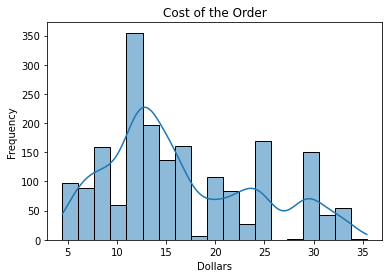

In [13]:
# Histogram for 'cost_of_the_order'
sns.histplot(data['cost_of_the_order'], kde=True)
plt.title('Cost of the Order')
plt.xlabel('Dollars')
plt.ylabel('Frequency')
plt.show()


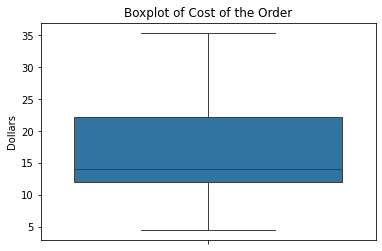

In [14]:
# Boxplot for 'cost_of_the_order'
sns.boxplot(data['cost_of_the_order'])
plt.title('Boxplot of Cost of the Order')
plt.ylabel('Dollars')
plt.show()

Text(0, 0.5, 'Frequency')

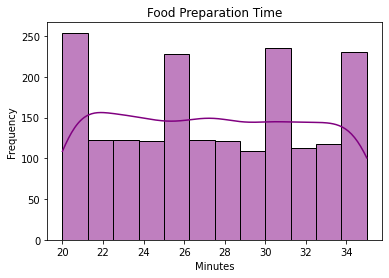

In [15]:
# Histogram for 'food_preparation_time'
sns.histplot(data['food_preparation_time'], kde=True, color = 'purple')
plt.title('Food Preparation Time')
plt.xlabel('Minutes')
plt.ylabel('Frequency')


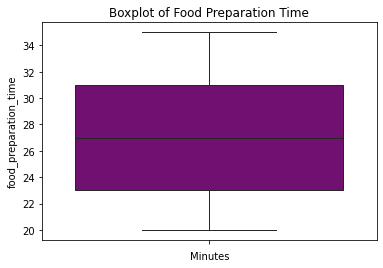

In [16]:
# Boxplot for 'food_preparation_time'
sns.boxplot(data['food_preparation_time'], color = 'purple')
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Minutes')
plt.show()

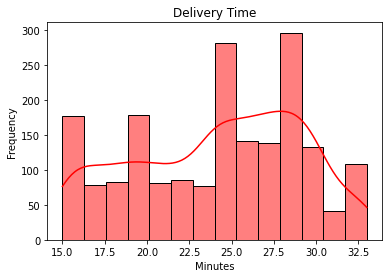

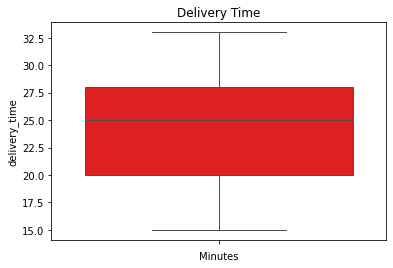

In [17]:
# Histogram for 'delivery_time'
sns.histplot(data['delivery_time'], kde=True, color = 'red')
plt.title('Delivery Time')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'delivery_time'
sns.boxplot(data['delivery_time'],color = 'red')
plt.title('Delivery Time')
plt.xlabel('Minutes')
plt.show()


**Univariate Analysis for Numerical Variables**
- **Cost of the order:** A histogram will reveal how costs are distributed, such as right, left, normally distributed. Here we see right skewed. This shows about 350 orders costing aorund 13 dollars. 
 - A boxplot will show if there are extreme orders with very high or low costs, in ours we see low of 4 and high of 35 dollars, with our median line at 13 dollars. 
- **Food preparation time:** The distribution will show average preparation times, In our case, we see slight uniform distribution with higher peaks, these peaks happen around every 5 minutes within the 20-35 minutes.
 - The boxplot will highlight outliers with exceptionally long or short durations, we see median at 27. The boxplot displays uniform distribution as well. 
- **Delivery time:** The histogram is left skewed, with a peak at 28 minutes and 25 minutes.
 - boxplot will reveal average delivery times and any long delivery times, we see median of 25 minutes here. 

In [18]:
categorical_vars = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

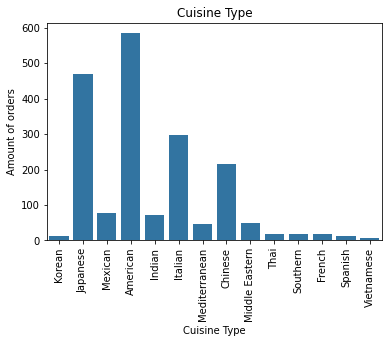

In [19]:
sns.countplot(x='cuisine_type', data=data)
plt.title('Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Amount of orders')
plt.xticks(rotation=90) 
plt.show()

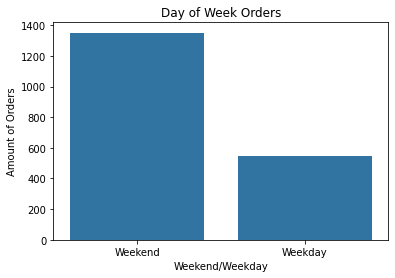

In [20]:
sns.countplot(x='day_of_the_week', data=data)
plt.title('Day of Week Orders')
plt.xlabel('Weekend/Weekday')
plt.ylabel('Amount of Orders')
plt.show()

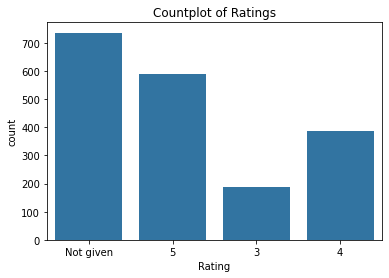

In [21]:
sns.countplot(x='rating', data=data)
plt.title('Countplot of Ratings')
plt.xlabel('Rating')
plt.show()

- **Restaurant Name:** A countplot will be too large for this, you would need to show limited amount vs all the names
- **Cuisine Type:** You can observe which cuisines are ordered most frequently, American food is shown to have the most orders.
- **Day of the Week:** This will show if there are days with more orders than others. Weekends have over double the amount of orders. 
- **Rating:** The countplot will show the distribution of ratings, identifying whether most orders are well-rated or not. Here we see a majority "not given". 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [22]:
top_5 = data['restaurant_name'].value_counts().nlargest(5)
print('Ranking in order is\n',top_5)

Ranking in order is
 Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:
Here we see top 5 in order and the amount of orders. Shake shack at the most then The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. 

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [23]:
# identify types in dataset
data['day_of_the_week'].unique()
# Filter for weekend
weekend_data = data[data['day_of_the_week'].isin(['Weekend'])]

# Find the most popular cuisine on weekends
most_popular_cuisine = weekend_data['cuisine_type'].value_counts().idxmax()
print('The most popular cuisine on weekends is: ',most_popular_cuisine)

The most popular cuisine on weekends is:  American


#### Observations:
The most popular food on weekend is American.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [24]:
# Calculate the number and percentage of orders that cost more than 20 dollars
orders_over20 = data[data['cost_of_the_order'] > 20].shape[0]
total_orders = data.shape[0]
percentage_20 = (orders_over20 / total_orders) * 100

print(percentage_20)

29.24130663856691


#### Observations:
About 29% of all orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [25]:
# Calculate the mean delivery time
meandelivery_time = data['delivery_time'].mean()
print(meandelivery_time)

24.161749209694417


#### Observations:
The mean order delivery time is: 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [26]:
top3customers = data['customer_id'].value_counts().nlargest(3)
print(top3customers)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:
The three IDs, are '52832' with 13 orders, '47440' with 20 orders, and '83287' with 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Numerical vs. Numerical Analysis

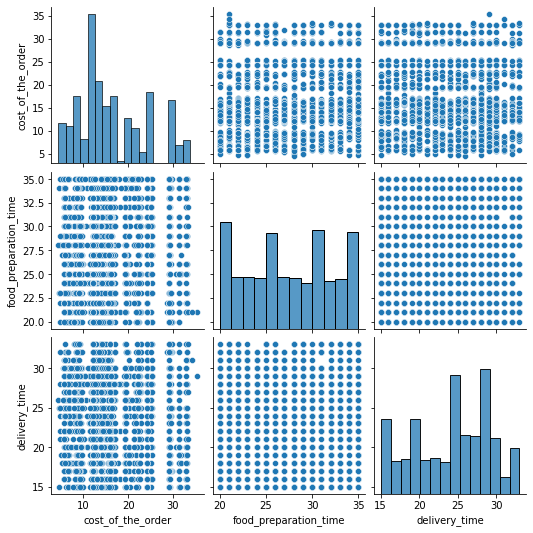

In [27]:
# Scatterplot for numerical variables
sns.pairplot(data[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])
plt.show()

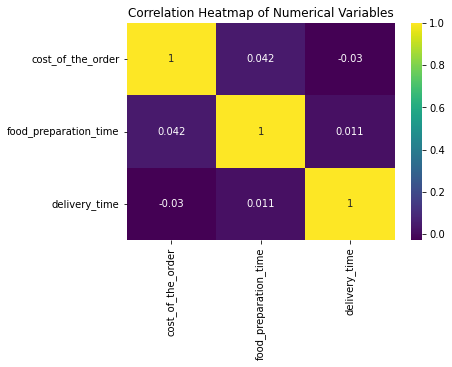

In [28]:
#Correlation Heatmap among numerical variables
correlation_matrix = data[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap= 'viridis')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#### Numerical and Categorical Variables relationship

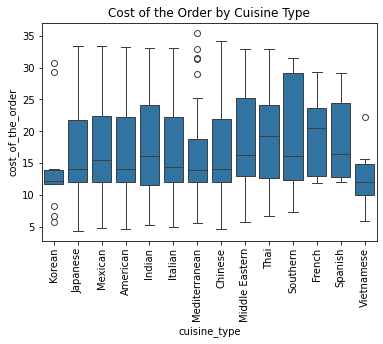

In [29]:
# Boxplot for cost of the order by cuisine type
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=data)
plt.xticks(rotation=90)
plt.title('Cost of the Order by Cuisine Type')
plt.show()


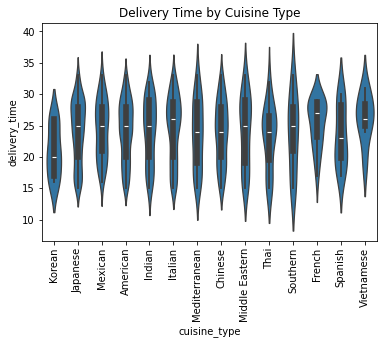

In [30]:
# Violin plot for delivery time by cuisine type
sns.violinplot(x='cuisine_type', y='delivery_time', data=data)
plt.xticks(rotation=90)
plt.title('Delivery Time by Cuisine Type')
plt.show()


**Observations:**
- The scatterplot for numerical variables shows left , uniform and right skewed data. 
- The heatmap has negative based correlation betweem numerical variables. 
- The boxplot shows comparable data for multiple cuisine types and cost.
- The violin plot gives us delivery time and cuisine type as well. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [31]:
#Filter rating data, "Not Given" is not numerical
filtered_data = data[data['rating'] != 'Not Given']


filtered_data['rating'] = pd.to_numeric(filtered_data['rating'], errors='coerce')

#Calculate rating counts for each restaurant then find how many are over 50
count_ratings = filtered_data['restaurant_name'].value_counts()

over_50ratings = count_ratings[count_ratings > 50].index

filtered_data = filtered_data[filtered_data['restaurant_name'].isin(over_50ratings)]

#Find average rating
average_rating = filtered_data.groupby('restaurant_name')['rating'].mean()

#Filter average rating greater than 4
promotional_restaurants = average_ratings[average_ratings > 4]

print(promotional_restaurants)

NameError: name 'average_ratings' is not defined

#### Observations:
- The resturaunts fulfilling the criteria for the offer is Blue Ribbon Fried Chicken , Blue Ribbon Sushi, Parm, RedFarm Broadway, RedFarm Hudson. Shake Shack and the Meatball Shop. The previous shows the ratings assigned with each resturaunt.   

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#utilize commission as revenue
data['commission'] = np.where(data['cost_of_the_order'] > 20,data['cost_of_the_order'] * 0.25,
                              np.where(data['cost_of_the_order'] > 5, data['cost_of_the_order'] * 0.15, 0))

total_revenue = data['commission'].sum()
print(total_revenue)

#### Observations:
- The company made 6,166 dollars from the companies. 

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#Orders taking more than 60 minutes
order_over = len(data[data['food_preparation_time'] + data['delivery_time'] > 60])
total_orders = len(data)

# Calculate the percentage
percentage = (order_over / total_orders) * 100
print(percentage)

#### Observations:
10.5% are over one hour (60 minutes) to deliver and being prepared. This indicates that most orders are delivered within an reasonable time.
    

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
#Calculate the mean delivery time for weekdays and weekends
mean_delivery_time = data.groupby('day_of_the_week')['delivery_time'].mean().reset_index()
print(mean_delivery_time)

#### Observations:
Weekdays may see higher order volumes leading to longer delivery times due to traffic and demand.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- Shake Shack is a highly sought after restaurant, good ratings, and high volume of orders. 
- The average price of a meal is between 20-30 dollars, the weekend had more orders vs weekdays (2 vs 5 days) with average wait time at 27 minutes. 

### Recommendations:

- Weekend delivery times are faster, the company could use this insight in marketing strategies, promoting weekend specials or highlighting faster delivery options.
- Times of day when orders and delays are more frequent.
- Implement a system for customers to provide feedback specifically about delivery times, meals and price.
- Utilized outsourced media (reddit, facebook, twitter, instagram and more) to monitor delivery performance metrics and feedback from customers.

---